# MODELADO UTILIZANDO DEEP LEARNING CON KERAS 

## CON SUBSAMPLING PARA REDUCIR EL NUMERO DE ROWS

Referencias sub-sampling:
* https://www.kdnuggets.com/2019/05/sample-huge-dataset-machine-learning.html
* https://www.polarmicrobes.org/how-i-learned-to-stop-worrying-and-love-subsampling-rarifying/
* https://freakonometrics.hypotheses.org/2133

Referencia modelado con Keras DL: 
* https://www.tensorflow.org/tutorials/keras/basic_regression
* https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
* https://keras.io/layers/core/

Referencia "DNN for Regression": https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
#Ubicamos el dataset
#path = "Z:\MASTER INT. ARTIFICIAL\TFM_DATA\CLEANDATA\\" # Path PC Desktop en casa
#path = "U:\MASTER INT. ARTIFICIAL\TFM_DATA\CLEANDATA\\" # Path Laptop en casa
path = "F:\\DATA_TFM\\CLEANDATA\\" #Path PC Desktop en el trabajo
archivo = "dataset_completo.csv"

In [4]:
#Cargamos el dataset y leemos todo, para despues hacer sumsampling
raw_dataset = pd.read_csv(path+archivo, usecols=['lin_det', 'piso_det', 'mód_opt', 'X\'', 'Y\'', 'Z\'', 'azimut', 'zenit',
                                             'tiempo', 't_selp', 'amp', 'frec_hits', 'aafit_azimut', 'aafit_zenit',
                                             'aafit_lambda', 'aafit_beta', 'bbfit_azimut', 'bbfit_zenit',
                                             'bbfit_quality', 'muon_azimut', 'muon_zenit'])#,nrows=10000)

In [5]:
#Realizamos el subsampling con n líneas
n=10000
rs=10
dataset = raw_dataset.sample(n, random_state=rs)
del raw_dataset #Borramos la anterior lista para liberar memoria
dataset.tail() #Mostramos como quedó el dataset

,lin_det,piso_det,mód_opt,X',Y',Z',azimut,zenit,tiempo,t_selp,...,frec_hits,aafit_azimut,aafit_zenit,aafit_lambda,aafit_beta,bbfit_azimut,bbfit_zenit,bbfit_quality,muon_azimut,muon_zenit
15675186,7,7,2,-35.477413,-15.095539,-83.514434,0.538065,2.356193,1111.213250,1111.213250,...,50.468445,-2.642994,1.581161,-6.514552,0.027619,-2.651094,1.606897,4.106721,-2.844497,1.626004
21153715,2,4,2,76.790921,57.827525,-127.803434,0.693055,2.356193,92.582143,92.582143,...,61.340332,-2.926584,1.357088,-5.881519,0.015498,-9.424778,1.306323,3.240517,-2.638245,1.583089
28343538,8,14,1,11.373284,-38.394692,18.272566,1.627880,2.356193,1112.395753,1059.810683,...,76.045990,0.134690,0.395073,-5.372895,0.007043,0.202409,0.378380,10.799513,0.115643,0.393628
22594244,7,15,0,-35.435291,-15.601902,32.677566,-0.372216,2.356193,1157.436781,1340.446590,...,148.773193,-2.230288,2.568302,-6.122077,0.007134,-2.174362,2.496019,4.713932,-2.167388,2.598427
25642591,4,4,0,44.390199,9.480367,-127.931434,-3.041185,2.356193,1400.076371,971.495534,...,53.329468,-1.216813,1.246325,-5.569547,0.011330,-1.561102,0.666758,16.605148,-1.688086,1.304435


C:\Users\Marco\Anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


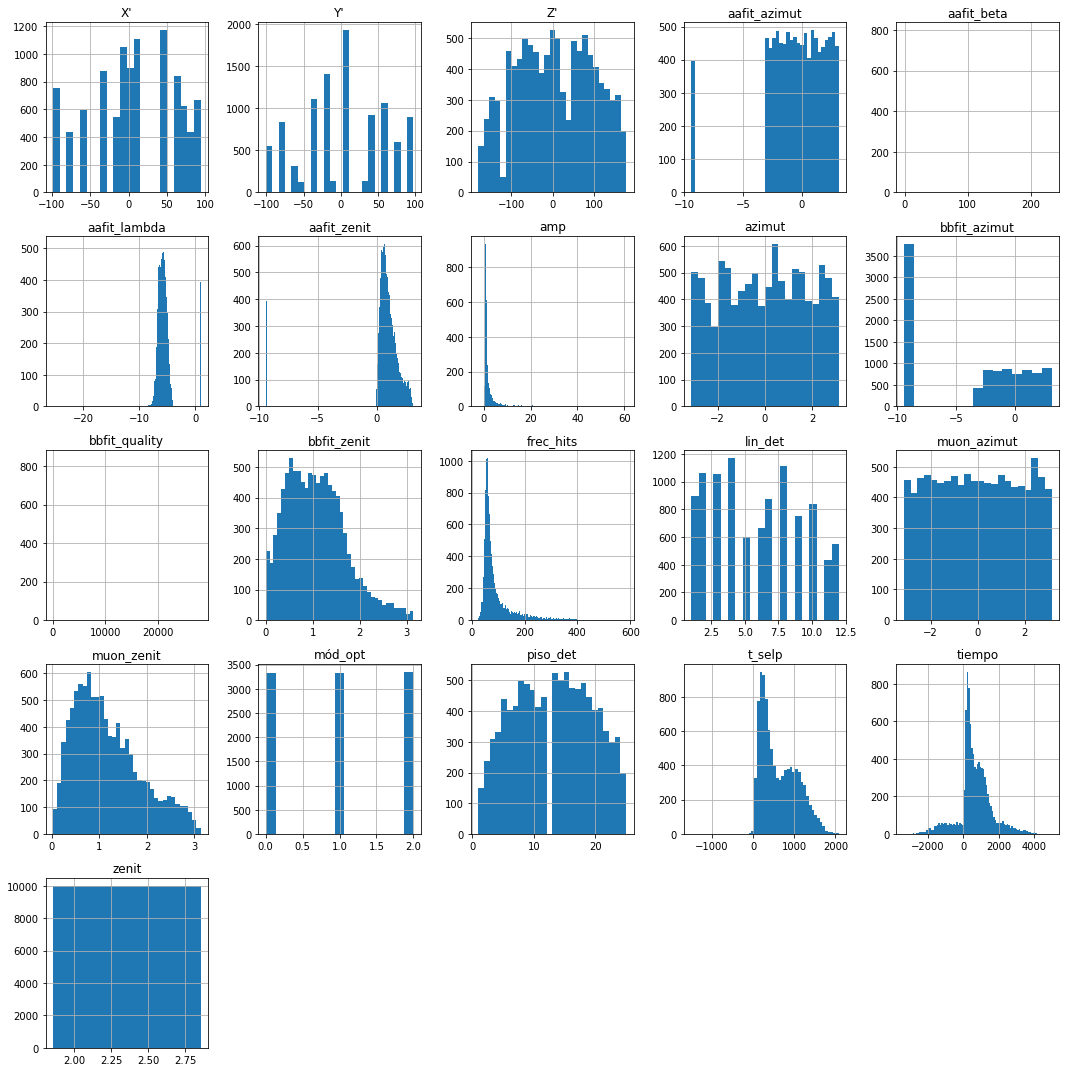

In [6]:
#Graficamos los histogramas de cada variable. (Tarda bastante...varios minutos)
fig = plt.figure(figsize= (15,15))
ax = fig.gca()
dataset.hist(ax=ax,bins='auto')
plt.tight_layout()
plt.show()

In [7]:
### DIVISION DE LA DATA EN TRAIN Y TEST PARA VALIDACIÓN HOLD-OUT INICIAL (VALIDACIÓN ANIDADA AL FINAL)
X = dataset.iloc[:,:19]; Y = dataset.iloc[:,19:21]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

train_dataset = X_train
test_dataset = X_test
train_labels = Y_train
test_labels = Y_test

In [8]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
lin_det,7000.0,5.889143,3.298503e+00,1.000000,3.000000,6.000000,9.000000,12.000000
piso_det,7000.0,13.171429,6.401041e+00,1.000000,8.000000,13.000000,18.000000,25.000000
mód_opt,7000.0,0.999857,8.165841e-01,0.000000,0.000000,1.000000,2.000000,2.000000
X',7000.0,7.444064,5.459588e+01,-98.410729,-35.477423,4.819282,59.529657,93.934807
Y',7000.0,4.404381,5.511363e+01,-101.017553,-38.883251,8.899396,56.715401,97.285109
Z',7000.0,4.902654,9.284525e+01,-180.034434,-69.529434,3.622566,76.218566,177.946108
azimut,7000.0,-0.005702,1.792573e+00,-3.119675,-1.556330,0.050360,1.524810,3.128265
zenit,7000.0,2.356193,4.441209e-16,2.356193,2.356193,2.356193,2.356193,2.356193
tiempo,7000.0,642.958139,9.592586e+02,-2950.127817,214.713113,543.055464,1125.407723,4094.922837
t_selp,7000.0,629.069083,4.362374e+02,-1501.918534,255.499185,504.926747,968.375142,2084.398824


In [9]:
train_labels.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
muon_azimut,7000.0,-0.001850,1.809883,-3.139295,-1.579825,-0.018814,1.571430,3.141137
muon_zenit,7000.0,1.175574,0.701572,0.020394,0.624730,1.035087,1.611884,3.096046


In [10]:
test_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
lin_det,3000.0,6.042667,3.363126,1.000000,3.000000,6.000000,9.000000,12.000000
piso_det,3000.0,13.094000,6.409227,1.000000,8.000000,13.000000,18.000000,25.000000
mód_opt,3000.0,1.008667,0.816178,0.000000,0.000000,1.000000,2.000000,2.000000
X',3000.0,6.542082,54.398588,-98.406270,-35.468594,4.775327,59.519716,93.934807
Y',3000.0,2.357404,56.195941,-101.032169,-39.151662,8.742069,56.447842,97.285109
Z',3000.0,3.799821,92.914699,-171.519434,-69.777892,3.622066,76.214566,177.946108
azimut,3000.0,0.073500,1.791599,-3.119675,-1.503265,0.165835,1.560330,3.128265
zenit,3000.0,2.356193,0.000000,2.356193,2.356193,2.356193,2.356193,2.356193
tiempo,3000.0,655.869636,960.493143,-3367.377155,216.274348,562.617679,1124.799242,4988.397927
t_selp,3000.0,631.555287,436.248333,-1227.519849,257.494934,508.694708,981.260373,1984.479526


In [11]:
test_labels.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
muon_azimut,3000.0,0.020925,1.814519,-3.139821,-1.550138,0.018263,1.603256,3.139282
muon_zenit,3000.0,1.167540,0.702533,0.047963,0.618125,1.027119,1.582827,3.131667


## MODELADO "DEEP LEARNING", DE TIPO MULTI-OUTPUT

<font size=3>En este caso nos sirve la division de train y test previa.</font>

In [189]:
#Construyendo el modelo, tener en cuenta la longitud debe ser correcta de salida

#Función que nos ayuda a construir modelos de D.L. para regresión con Keras
#Este modelo tiene unas capas con una cantidad de nodos "baja"
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(32, activation=tf.nn.relu),
        layers.Dense(2)
    ])
    opt = tf.keras.optimizers.RMSprop(0.001) #Revisar si hay que aumentarlo o disminuirlo!!!, ¿menor o mayor learning rate?
    model.compile(loss='mean_squared_error', optimizer = opt, metrics=['mean_absolute_error','mean_squared_error'])
    return model

In [190]:
#Construyendo el modelo
model = build_model()

In [191]:
#Viendo el resumen (capas y parámetros) del modelo
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_177 (Dense)            (None, 64)                832       
_________________________________________________________________
dense_178 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_179 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_180 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_181 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_182 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_183 (Dense)            (None, 2)                 66        
Total para

In [192]:
#Probando si la salida del modelo es del "shape" esperado
example_batch = train_dataset[:5]
result = model.predict(example_batch)

In [193]:
#Viendo el "batch" de ejemplo
example_batch

,lin_det,piso_det,mód_opt,X',Y',Z',azimut,zenit,tiempo,t_selp,amp,frec_hits
20761713,5,19,1,-57.807253,78.556881,89.978566,-0.071791,2.356193,411.210397,411.210397,4.725892,106.430054
14060300,1,3,0,4.924304,96.385746,-150.969892,0.191450,2.356193,847.105915,582.624842,1.733741,81.806183
46488793,2,19,0,76.805180,57.809734,90.170566,0.653550,2.356193,267.968618,266.191393,0.732691,68.988800
40236418,1,10,0,4.704033,97.169995,-49.279434,0.925251,2.356193,778.822072,778.822072,0.497820,78.601837
22099883,2,23,1,76.793383,57.824539,148.291566,0.686250,2.356193,740.708892,740.708892,3.062962,152.530670


In [194]:
#"Observando" la "forma" de la salida del modelo prediciendo (aun sin entrenar)
#solo queremos que la "forma" de salida sea la correcta
result

array([[ -3.8638232,   5.6444016],
       [-24.554003 ,   9.320155 ],
       [ -4.277238 ,   3.2852805],
       [-13.759412 ,  13.227919 ],
       [ -8.085201 ,  15.782025 ]], dtype=float32)

In [195]:
# Realizando el proceso de entrenamiento e imprimiendo un punto por cada epoca usando "callbacks"
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500
#Entrenamos el modelo, el verbose se puede cambiar a uno si lo deseamos para visualizar mas a detalle el proceso
history = model.fit(train_dataset, train_labels, epochs=EPOCHS, validation_split = 0.3, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [196]:
#Guardamos el modelo ya entrenado y sus resultados en un DataFrama para análisis posterior
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
495,0.890282,0.678365,0.890281,2.657876,1.193261,2.657876,495
496,0.883110,0.677481,0.883110,2.846090,1.221039,2.846091,496
497,0.881124,0.675446,0.881124,2.806504,1.215731,2.806504,497
498,0.896808,0.679946,0.896808,2.848839,1.229650,2.848839,498
499,0.869237,0.669913,0.869237,2.913189,1.231409,2.913189,499


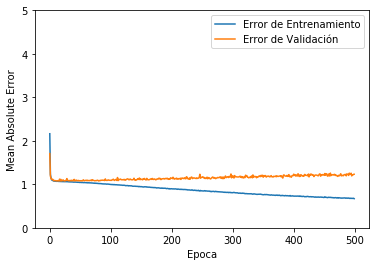

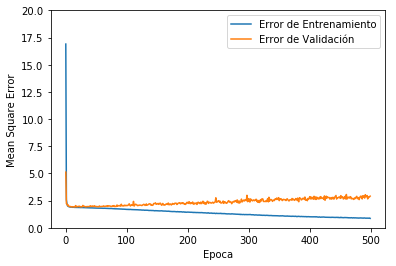

In [197]:
#Esta función nos permite graficar el MAE y MSE vs las épocas
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoca')
  plt.ylabel('Mean Absolute Error')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Error de Entrenamiento')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Error de Validación')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoca')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Error de Entrenamiento')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Error de Validación')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

#Graficando MAE & MSE vs épocas
plot_history(history)


..................................

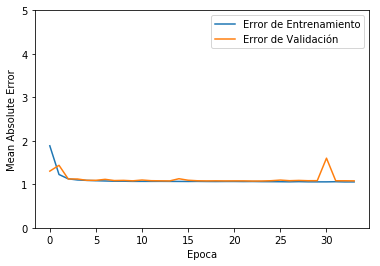

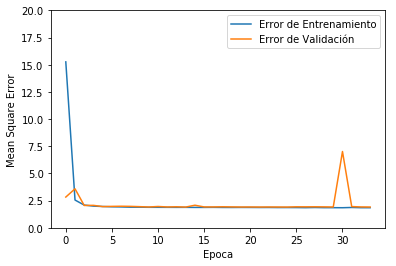

In [198]:
#Volviendo a re-entrenar el modelo pero ahora, para detenerlo en caso de que no mejore el score de validación.
#Se utilizará una llamada de "Parada Temprana".
#Tomado de la referencia de keras de regresión básica

model_early_stop = build_model()

#El parámetro patience es el número de épocas que esperaremos para una mejora
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model_early_stop.fit(train_dataset, train_labels, epochs=EPOCHS,
                    validation_split = 0.3, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [199]:
#Verificando que tan bien generaliza el modelo y evaluando 
#las métricas de error: loss, mae y mse, para el modelo sobre el conjunto de test

loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=0)

print("Mean Abs Error, del conjunto de Test: {:5.2f}".format(mae))
print("Mean Square Error, del conjunto de Test: {:5.2f}".format(mse))

Mean Abs Error, del conjunto de Test:  1.24
Mean Square Error, del conjunto de Test:  2.95


In [200]:
# Generando las predicciones
y_predict = model.predict(X_test)

In [201]:
#Comparando algunas predicciones vs valores reales
templist1 = []
print("Valores Predichos")
print(y_predict[0:5])
#print(pd.DataFrame(templist1).transpose())
print("Valores Reales")
print(Y_test.iloc[0:5].values)

Valores Predichos
[[-1.3098167   1.5259335 ]
 [ 0.10731491  1.0279188 ]
 [ 1.0694253   1.096132  ]
 [-1.3613393   1.2485825 ]
 [-1.9760319   0.30445516]]
Valores Reales
[[-0.01410099  0.43851354]
 [ 0.90625105  0.74593764]
 [ 0.81327691  0.33611374]
 [-0.70962814  1.61685259]
 [-0.55983427  1.07146232]]


In [202]:
#Obteniendo algunas métricas importantes utilizando las funciones de scikit learn
from sklearn.metrics import mean_absolute_error, max_error, mean_squared_error
import numpy as np

def metricas(y_true,y_predict):
    mae = mean_absolute_error(y_true,y_predict)
    mse = mean_squared_error(y_true,y_predict)
    rmse = np.sqrt(mse)
    maxe= max_error(y_true,y_predict)
    mape = np.mean(np.abs((y_true-y_predict)/y_true)) * 100
    return(mae,mse,rmse,mape,maxe)

mae_maz,mse_maz,rmse_maz,mape_maz,maxe_maz = metricas(Y_test.iloc[:,0],y_predict[:,0])
mae_mze,mse_mze,rmse_mze,mape_mze,maxe_mze = metricas(Y_test.iloc[:,1],y_predict[:,1])

row_maz = [mae_maz,mse_maz,rmse_maz,mape_maz,maxe_maz]
row_mze = [mae_mze,mse_mze,rmse_mze,mape_mze,maxe_mze]

data_errors = [row_maz,row_mze]

met_df = pd.DataFrame(data_errors, columns=['MAE','MSE','RMSE','MAPE','MAXE'])

print("\nMétricas de error, 0=Muon_Azimut, 1=Muon_Zenit")
met_df.transpose()


Métricas de error, 0=Muon_Azimut, 1=Muon_Zenit


,0,1
MAE,1.859968,0.621695
MSE,5.261587,0.631954
RMSE,2.293815,0.794955
MAPE,320.409535,98.042539
MAXE,18.236537,4.128521


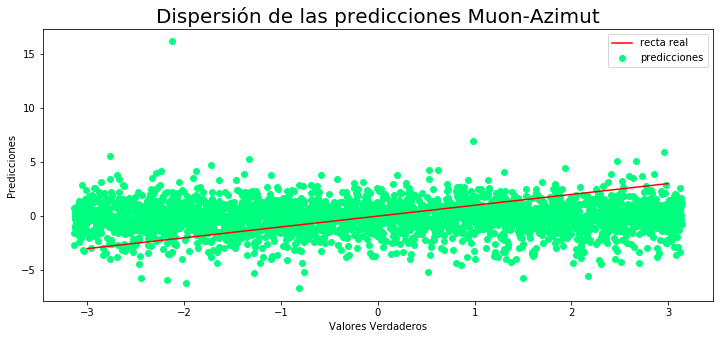

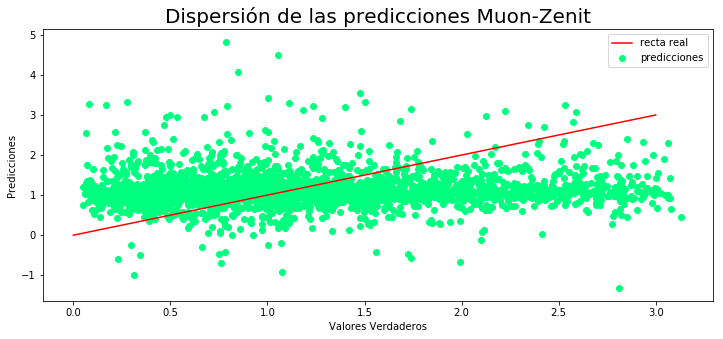

In [203]:
#Graficando la dispersión de las predicciones
plt.figure(figsize=(12,5))
plt.title("Dispersión de las predicciones Muon-Azimut", size=20)
plt.xlabel('Valores Verdaderos')
plt.ylabel('Predicciones')
plt.scatter(Y_test.iloc[:,0],y_predict[:,0], c="springgreen",label="predicciones")
_ = plt.plot([-3, 3], [-3, 3],c="red",label="recta real")
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.title("Dispersión de las predicciones Muon-Zenit", size=20)
plt.xlabel('Valores Verdaderos')
plt.ylabel('Predicciones')
plt.scatter(Y_test.iloc[:,1],y_predict[:,1], c="springgreen",label="predicciones")
_ = plt.plot([0, 3], [0, 3],c="red",label="recta real")
plt.legend()
plt.show()

# PRUEBA CON UN MODELO DE MAYOR NÚMERO DE CAPAS

In [204]:
#Probando con otro tipo de modelo para tratar de mejorar la salida y minimizar el error

def build_model_2():
    model = keras.Sequential([
        #Capa inicial, incluye la forma de la entrada
        layers.Dense(128, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
        #Capas "ocultas"
        layers.Dense(512, activation=tf.nn.relu),
        layers.Dense(512, activation=tf.nn.relu),
        layers.Dense(512, activation=tf.nn.relu),
        layers.Dense(512, activation=tf.nn.relu),
        layers.Dense(256, activation=tf.nn.relu),
        layers.Dense(128, activation=tf.nn.relu),
        #Capa de salida
        layers.Dense(2)
    ])
    opt = tf.keras.optimizers.RMSprop(0.001) #Revisar si hay que aumentarlo o disminuirlo!!!, ¿menor o mayor learning rate?
    model.compile(loss='mean_squared_error', optimizer = opt, metrics=['mean_absolute_error','mean_squared_error'])
    return model

In [205]:
model2 = build_model_2()
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_191 (Dense)            (None, 128)               1664      
_________________________________________________________________
dense_192 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_193 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_194 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_195 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_196 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_197 (Dense)            (None, 128)               32896     
__________


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

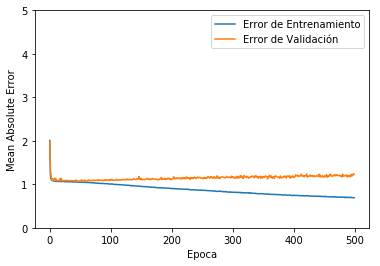

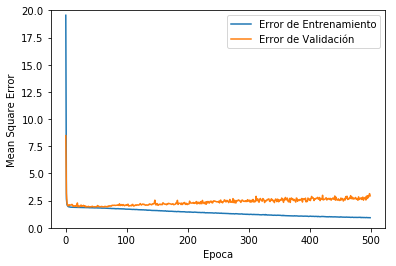

In [206]:
# Realizando el proceso de entrenamiento e imprimiendo un punto por cada epoca usando "callbacks"
# También se incorpora un proceso de "parada" en caso de que no mejore la pérdida

model_early_stop = build_model()

EPOCHS=500

#El parámetro patience es el número de épocas que esperaremos para una mejora
early_stop = keras.callbacks.EarlyStopping(monitor='mean_absolute_error', patience=20)

history = model_early_stop.fit(train_dataset, train_labels, epochs=EPOCHS,
                    validation_split = 0.3, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [207]:
#Guardamos el modelo ya entrenado y sus resultados en un DataFrama para análisis posterior
hist2 = pd.DataFrame(history.history)
hist2['epoch'] = history.epoch
hist2.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
495,0.935077,0.691426,0.935078,2.950181,1.226481,2.950181,495
496,0.931554,0.694138,0.931555,2.770770,1.194427,2.770770,496
497,0.928308,0.691770,0.928308,2.958618,1.229821,2.958618,497
498,0.931866,0.694545,0.931867,3.143546,1.243985,3.143545,498
499,0.929227,0.692685,0.929226,2.939373,1.222908,2.939373,499


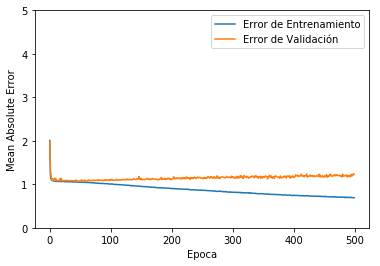

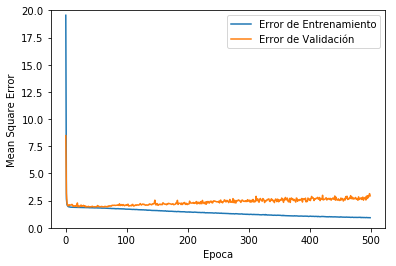

In [208]:
#Graficando MAE & MSE vs épocas
plot_history(history)

In [209]:
# Generando las predicciones
y_predict = model_early_stop.predict(X_test)

#Comparando algunas predicciones vs valores reales
print("Valores Predichos")
print(y_predict[0:5])
print("Valores Reales")
print(Y_test.iloc[0:5].values)

Valores Predichos
[[ 2.7001989e-01  2.0346346e+00]
 [-6.6818380e-01  1.1378133e+00]
 [ 4.6030575e-01  1.0315359e+00]
 [ 3.6946851e-01  9.0037221e-01]
 [ 6.7563698e-02 -1.0728836e-05]]
Valores Reales
[[-0.01410099  0.43851354]
 [ 0.90625105  0.74593764]
 [ 0.81327691  0.33611374]
 [-0.70962814  1.61685259]
 [-0.55983427  1.07146232]]


In [210]:
#Obteniendo algunas métricas importantes utilizando las funciones de scikit learn
mae_maz,mse_maz,rmse_maz,mape_maz,maxe_maz = metricas(Y_test.iloc[:,0],y_predict[:,0])
mae_mze,mse_mze,rmse_mze,mape_mze,maxe_mze = metricas(Y_test.iloc[:,1],y_predict[:,1])

row_maz = [mae_maz,mse_maz,rmse_maz,mape_maz,maxe_maz]
row_mze = [mae_mze,mse_mze,rmse_mze,mape_mze,maxe_mze]

data_errors = [row_maz,row_mze]

met_df = pd.DataFrame(data_errors, columns=['MAE','MSE','RMSE','MAPE','MAXE'])

print("\nMétricas de error, 0=Muon_Azimut, 1=Muon_Zenit")
met_df.transpose()


Métricas de error, 0=Muon_Azimut, 1=Muon_Zenit


,0,1
MAE,1.800095,0.621642
MSE,4.923997,0.630145
RMSE,2.219008,0.793817
MAPE,361.894245,92.482945
MAXE,10.529688,3.498507


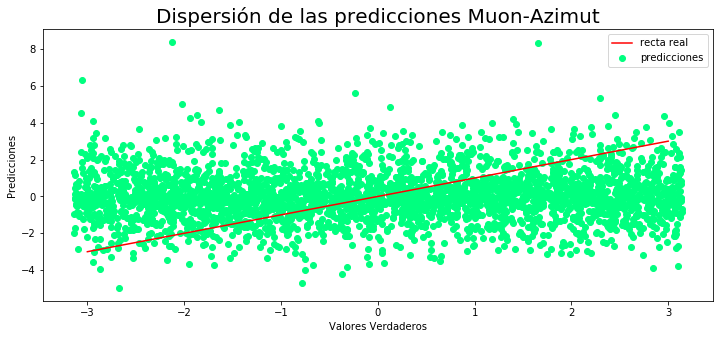

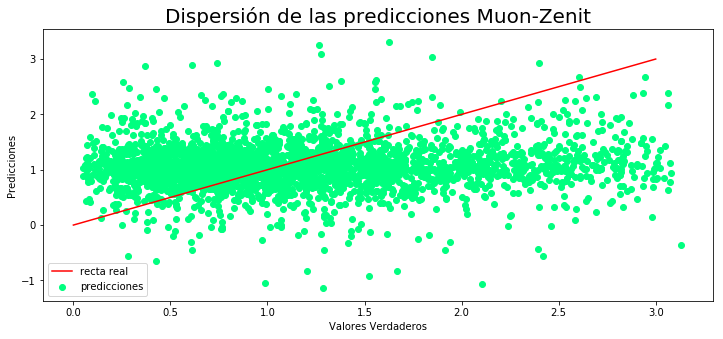

In [211]:
#Graficando la dispersión de las predicciones
plt.figure(figsize=(12,5))
plt.title("Dispersión de las predicciones Muon-Azimut", size=20)
plt.xlabel('Valores Verdaderos')
plt.ylabel('Predicciones')
plt.scatter(Y_test.iloc[:,0],y_predict[:,0], c="springgreen",label="predicciones")
_ = plt.plot([-3, 3], [-3, 3],c="red",label="recta real")
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.title("Dispersión de las predicciones Muon-Zenit", size=20)
plt.xlabel('Valores Verdaderos')
plt.ylabel('Predicciones')
plt.scatter(Y_test.iloc[:,1],y_predict[:,1], c="springgreen",label="predicciones")
_ = plt.plot([0, 3], [0, 3],c="red",label="recta real")
plt.legend()
plt.show()

# Tratando de mejorar las predicciones al "eliminar" columnas que pudieran inducir ruido. Adicionalmente unicamente usare las columnas con la data relativa a los "hits".

In [212]:
dataset_hits_data_only = dataset[['lin_det','piso_det','mód_opt','X\'', 'Y\'','Z\'','azimut', 'zenit',
       'tiempo', 't_selp', 'amp', 'frec_hits', 'muon_azimut','muon_zenit']]

C:\Users\Marco\Anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


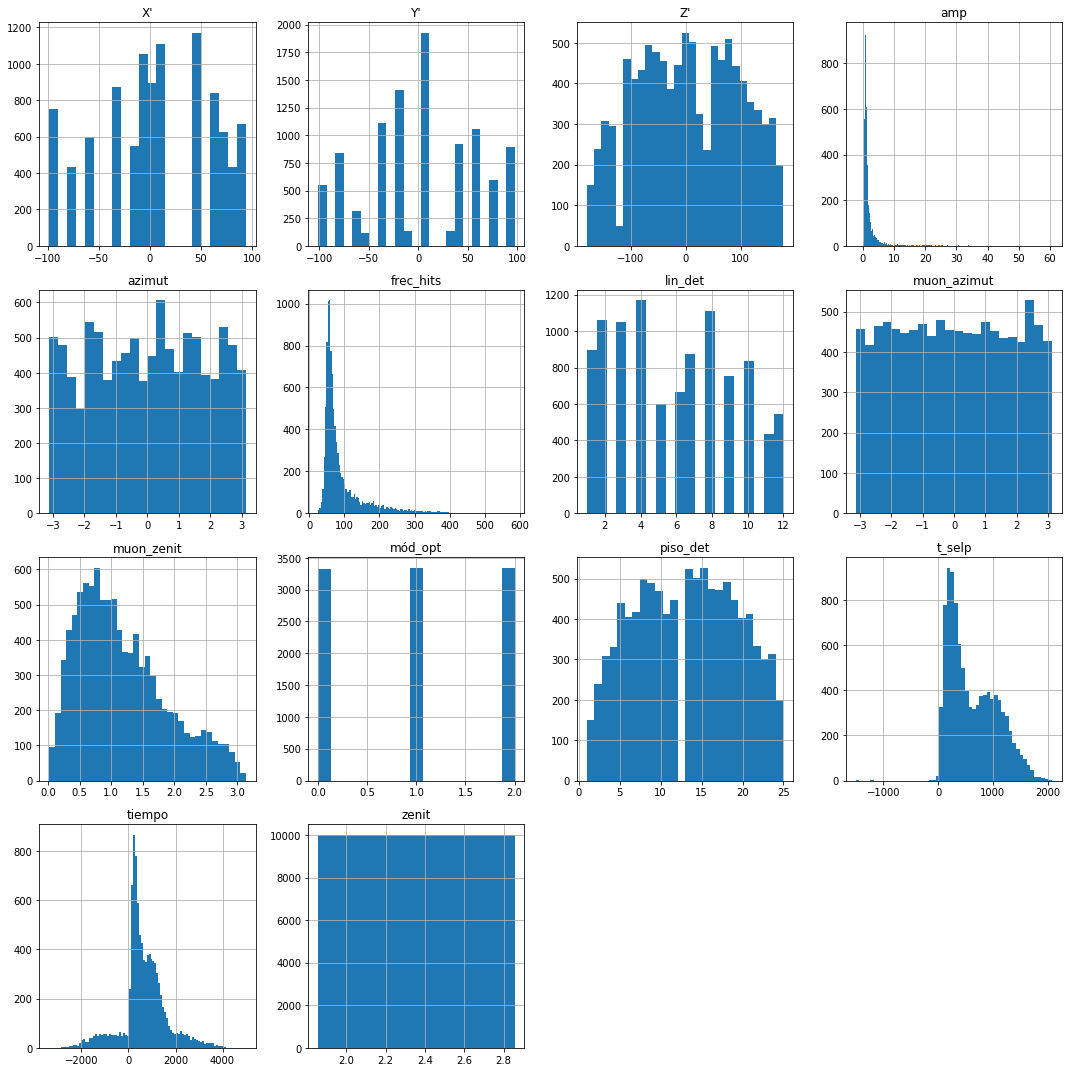

In [213]:
#Graficamos los histogramas de cada variable. (Tarda bastante...varios minutos)
fig = plt.figure(figsize= (15,15))
ax = fig.gca()
dataset_hits_data_only.hist(ax=ax,bins='auto')
plt.tight_layout()
plt.show()

In [214]:
dataset_hits_data_only.tail()

,lin_det,piso_det,mód_opt,X',Y',Z',azimut,zenit,tiempo,t_selp,amp,frec_hits,muon_azimut,muon_zenit
15675186,7,7,2,-35.477413,-15.095539,-83.514434,0.538065,2.356193,1111.213250,1111.213250,3.000818,50.468445,-2.844497,1.626004
21153715,2,4,2,76.790921,57.827525,-127.803434,0.693055,2.356193,92.582143,92.582143,23.569867,61.340332,-2.638245,1.583089
28343538,8,14,1,11.373284,-38.394692,18.272566,1.627880,2.356193,1112.395753,1059.810683,1.156979,76.045990,0.115643,0.393628
22594244,7,15,0,-35.435291,-15.601902,32.677566,-0.372216,2.356193,1157.436781,1340.446590,0.844487,148.773193,-2.167388,2.598427
25642591,4,4,0,44.390199,9.480367,-127.931434,-3.041185,2.356193,1400.076371,971.495534,1.082061,53.329468,-1.688086,1.304435


In [215]:
### DIVISION DE LA DATA EN TRAIN Y TEST PARA VALIDACIÓN HOLD-OUT INICIAL (VALIDACIÓN ANIDADA AL FINAL)
X = dataset_hits_data_only.iloc[:,:12]; Y = dataset_hits_data_only.iloc[:,12:14]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

train_dataset = X_train
test_dataset = X_test
train_labels = Y_train
test_labels = Y_test

In [216]:
#Generando el modelo y visualizando las capas y # de parámetros
model_hits = build_model_2()
model_hits.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_206 (Dense)            (None, 128)               1664      
_________________________________________________________________
dense_207 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_208 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_209 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_210 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_211 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_212 (Dense)            (None, 128)               32896     
__________

In [217]:
# Realizando el proceso de entrenamiento e imprimiendo un punto por cada epoca usando "callbacks"
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500
#Entrenamos el modelo, el verbose se puede cambiar a uno si lo deseamos para visualizar mas a detalle el proceso
history = model_hits.fit(train_dataset, train_labels, epochs=EPOCHS, validation_split = 0.3, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [218]:
#Guardamos el modelo ya entrenado y sus resultados en un DataFrama para análisis posterior
hist_hits_only = pd.DataFrame(history.history)
hist_hits_only['epoch'] = history.epoch
hist_hits_only.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
495,0.469691,0.472076,0.469691,3.142542,1.296591,3.142542,495
496,0.481661,0.472957,0.481661,2.958767,1.269614,2.958767,496
497,0.480046,0.474396,0.480046,2.797371,1.239882,2.797371,497
498,0.473291,0.476121,0.473291,2.862718,1.239929,2.862718,498
499,0.501028,0.482017,0.501028,2.807947,1.242216,2.807947,499


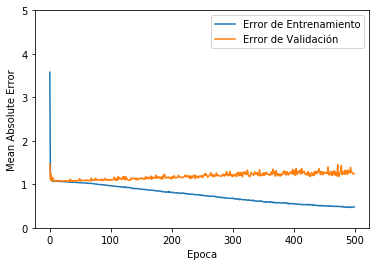

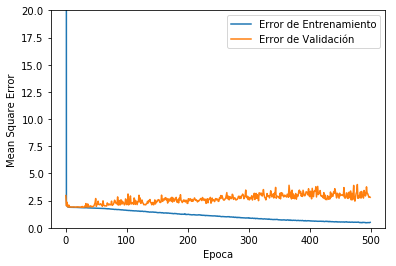

In [219]:
#Graficando MAE & MSE vs épocas
plot_history(history)

In [220]:
# Generando las predicciones
y_predict = model_hits.predict(X_test)

#Comparando algunas predicciones vs valores reales
print("Valores Predichos")
print(y_predict[0:5])
print("Valores Reales")
print(Y_test.iloc[0:5].values)

Valores Predichos
[[ 0.3915223   1.5963161 ]
 [-1.3235772   1.0526571 ]
 [-0.9158235   0.89514047]
 [-1.2753911   1.5477464 ]
 [-2.795268    0.48196328]]
Valores Reales
[[-0.01410099  0.43851354]
 [ 0.90625105  0.74593764]
 [ 0.81327691  0.33611374]
 [-0.70962814  1.61685259]
 [-0.55983427  1.07146232]]


In [221]:
#Obteniendo algunas métricas importantes utilizando las funciones de scikit learn
mae_maz,mse_maz,rmse_maz,mape_maz,maxe_maz = metricas(Y_test.iloc[:,0],y_predict[:,0])
mae_mze,mse_mze,rmse_mze,mape_mze,maxe_mze = metricas(Y_test.iloc[:,1],y_predict[:,1])

row_maz = [mae_maz,mse_maz,rmse_maz,mape_maz,maxe_maz]
row_mze = [mae_mze,mse_mze,rmse_mze,mape_mze,maxe_mze]

data_errors = [row_maz,row_mze]

met_df = pd.DataFrame(data_errors, columns=['MAE','MSE','RMSE','MAPE','MAXE'])

print("\nMétricas de error, 0=Muon_Azimut, 1=Muon_Zenit")
met_df.transpose()


Métricas de error, 0=Muon_Azimut, 1=Muon_Zenit


,0,1
MAE,1.764669,0.639999
MSE,4.695779,0.645872
RMSE,2.166975,0.803662
MAPE,409.413105,105.514540
MAXE,7.626659,3.262626


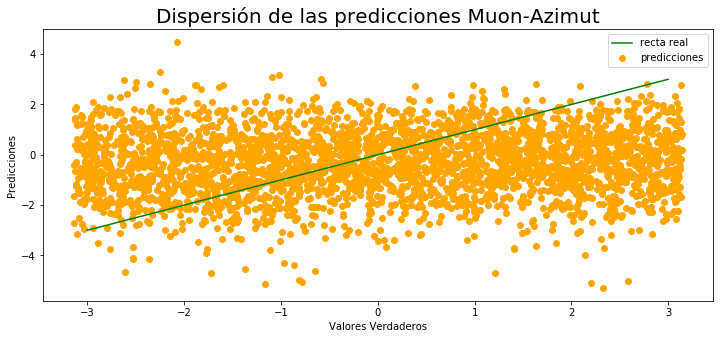

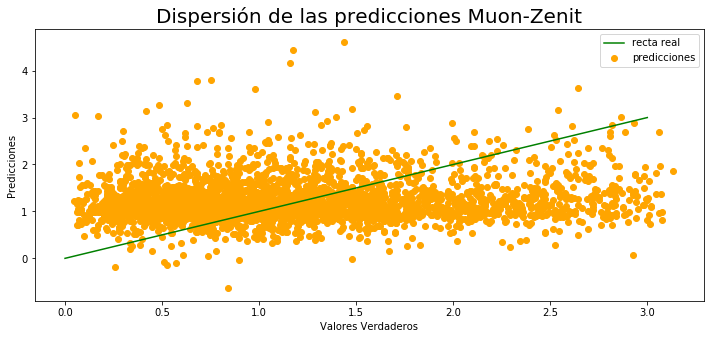

In [222]:
#Graficando la dispersión de las predicciones
plt.figure(figsize=(12,5))
plt.title("Dispersión de las predicciones Muon-Azimut", size=20)
plt.xlabel('Valores Verdaderos')
plt.ylabel('Predicciones')
plt.scatter(Y_test.iloc[:,0],y_predict[:,0], c="orange",label="predicciones")
_ = plt.plot([-3, 3], [-3, 3],c="green",label="recta real")
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.title("Dispersión de las predicciones Muon-Zenit", size=20)
plt.xlabel('Valores Verdaderos')
plt.ylabel('Predicciones')
plt.scatter(Y_test.iloc[:,1],y_predict[:,1], c="orange",label="predicciones")
_ = plt.plot([0, 3], [0, 3],c="green",label="recta real")
plt.legend()
plt.show()

<font size=4>**Análisis:**</font>

<font size=3>
Este modelo con mayor número de capas y eliminando las columnas relativas a los valores de aafit y bbfit, produce "mejores resultados" que el anterior, sin embargo distan de ser considerados como buenos, por lo que procederemos a intentar mejorar el modelo de red neuronal.</font>

## MODELO PARA INTENTAR MEJORAR LOS RESULTADOS SOLO CON DATOS DE HITS

In [231]:
#Probando con otro tipo de modelo para tratar de mejorar la salida y minimizar el error
def build_model_3():
    model = keras.Sequential([
        #Capa inicial, incluye la forma de la entrada
        layers.Dense(32, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
        #Capas "ocultas"
        layers.Dense(32, activation=tf.nn.relu),
        #layers.Dense(32, activation=tf.nn.relu),
        #layers.Dense(1024, activation=tf.nn.relu),
        #layers.Dense(1024, activation=tf.nn.relu),
        #Capa de salida
        layers.Dense(2)
    ])
    opt = tf.keras.optimizers.RMSprop(0.001) #Revisar si hay que aumentarlo o disminuirlo!!!, ¿menor o mayor learning rate?
    model.compile(loss='mean_squared_error', optimizer = opt, metrics=['mean_absolute_error','mean_squared_error'])
    return model

In [232]:
#Generando el modelo y visualizando las capas y # de parámetros
model_hits = build_model_3()
model_hits.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_226 (Dense)            (None, 32)                416       
_________________________________________________________________
dense_227 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_228 (Dense)            (None, 2)                 66        
Total params: 1,538
Trainable params: 1,538
Non-trainable params: 0
_________________________________________________________________


Train on 4900 samples, validate on 2100 samples
Epoch 1/500
4900/4900 [==============================] - 2s 344us/sample - loss: 855.0600 - mean_absolute_error: 14.6985 - mean_squared_error: 855.0601 - val_loss: 280.7429 - val_mean_absolute_error: 8.6253 - val_mean_squared_error: 280.7429
Epoch 2/500
4900/4900 [==============================] - 1s 196us/sample - loss: 57.7315 - mean_absolute_error: 5.0491 - mean_squared_error: 57.7315 - val_loss: 54.0506 - val_mean_absolute_error: 3.2067 - val_mean_squared_error: 54.0506
Epoch 3/500
4900/4900 [==============================] - 1s 177us/sample - loss: 43.0208 - mean_absolute_error: 4.2922 - mean_squared_error: 43.0209 - val_loss: 51.9407 - val_mean_absolute_error: 3.8713 - val_mean_squared_error: 51.9407
Epoch 4/500
4900/4900 [==============================] - 1s 180us/sample - loss: 35.9065 - mean_absolute_error: 3.9367 - mean_squared_error: 35.9065 - val_loss: 25.2893 - val_mean_absolute_error: 2.1208 - val_mean_squared_error: 25.2893

Epoch 35/500
4900/4900 [==============================] - 1s 183us/sample - loss: 4.5580 - mean_absolute_error: 1.5374 - mean_squared_error: 4.5580 - val_loss: 6.4390 - val_mean_absolute_error: 1.4038 - val_mean_squared_error: 6.4391
Epoch 36/500
4900/4900 [==============================] - 1s 178us/sample - loss: 4.1507 - mean_absolute_error: 1.4870 - mean_squared_error: 4.1507 - val_loss: 6.5247 - val_mean_absolute_error: 1.5286 - val_mean_squared_error: 6.5247
Epoch 37/500
4900/4900 [==============================] - 1s 179us/sample - loss: 4.1030 - mean_absolute_error: 1.4955 - mean_squared_error: 4.1030 - val_loss: 8.3770 - val_mean_absolute_error: 1.6798 - val_mean_squared_error: 8.3770
Epoch 38/500
4900/4900 [==============================] - 1s 182us/sample - loss: 3.8634 - mean_absolute_error: 1.4440 - mean_squared_error: 3.8634 - val_loss: 9.0968 - val_mean_absolute_error: 1.8327 - val_mean_squared_error: 9.0968
Epoch 39/500
4900/4900 [==============================] - 1s 176

Epoch 70/500
4900/4900 [==============================] - 1s 187us/sample - loss: 1.9895 - mean_absolute_error: 1.0933 - mean_squared_error: 1.9895 - val_loss: 3.2388 - val_mean_absolute_error: 1.2712 - val_mean_squared_error: 3.2388
Epoch 71/500
4900/4900 [==============================] - 1s 169us/sample - loss: 1.9724 - mean_absolute_error: 1.0866 - mean_squared_error: 1.9724 - val_loss: 2.9845 - val_mean_absolute_error: 1.2281 - val_mean_squared_error: 2.9845
Epoch 72/500
4900/4900 [==============================] - 1s 167us/sample - loss: 1.9609 - mean_absolute_error: 1.0854 - mean_squared_error: 1.9609 - val_loss: 2.8722 - val_mean_absolute_error: 1.1219 - val_mean_squared_error: 2.8722
Epoch 73/500
4900/4900 [==============================] - 1s 176us/sample - loss: 1.9417 - mean_absolute_error: 1.0806 - mean_squared_error: 1.9417 - val_loss: 2.6985 - val_mean_absolute_error: 1.1459 - val_mean_squared_error: 2.6985
Epoch 74/500
4900/4900 [==============================] - 1s 170

4900/4900 [==============================] - 1s 189us/sample - loss: 1.8380 - mean_absolute_error: 1.0483 - mean_squared_error: 1.8380 - val_loss: 2.1377 - val_mean_absolute_error: 1.0833 - val_mean_squared_error: 2.1377
Epoch 105/500
4900/4900 [==============================] - 1s 184us/sample - loss: 1.8373 - mean_absolute_error: 1.0459 - mean_squared_error: 1.8373 - val_loss: 2.1300 - val_mean_absolute_error: 1.1020 - val_mean_squared_error: 2.1300
Epoch 106/500
4900/4900 [==============================] - 1s 185us/sample - loss: 1.8314 - mean_absolute_error: 1.0464 - mean_squared_error: 1.8314 - val_loss: 2.3925 - val_mean_absolute_error: 1.0823 - val_mean_squared_error: 2.3925
Epoch 107/500
4900/4900 [==============================] - 1s 189us/sample - loss: 1.8279 - mean_absolute_error: 1.0437 - mean_squared_error: 1.8279 - val_loss: 2.2479 - val_mean_absolute_error: 1.0908 - val_mean_squared_error: 2.2479
Epoch 108/500
4900/4900 [==============================] - 1s 187us/sample

Epoch 139/500
4900/4900 [==============================] - 1s 201us/sample - loss: 1.7931 - mean_absolute_error: 1.0338 - mean_squared_error: 1.7931 - val_loss: 2.9636 - val_mean_absolute_error: 1.0962 - val_mean_squared_error: 2.9636
Epoch 140/500
4900/4900 [==============================] - 1s 189us/sample - loss: 1.7911 - mean_absolute_error: 1.0337 - mean_squared_error: 1.7911 - val_loss: 3.2333 - val_mean_absolute_error: 1.1013 - val_mean_squared_error: 3.2333
Epoch 141/500
4900/4900 [==============================] - 1s 196us/sample - loss: 1.7926 - mean_absolute_error: 1.0332 - mean_squared_error: 1.7926 - val_loss: 2.8617 - val_mean_absolute_error: 1.0926 - val_mean_squared_error: 2.8617
Epoch 142/500
4900/4900 [==============================] - 1s 226us/sample - loss: 1.7904 - mean_absolute_error: 1.0308 - mean_squared_error: 1.7904 - val_loss: 2.8243 - val_mean_absolute_error: 1.0843 - val_mean_squared_error: 2.8243
Epoch 143/500
4900/4900 [==============================] - 1

Epoch 174/500
4900/4900 [==============================] - 1s 244us/sample - loss: 1.7669 - mean_absolute_error: 1.0228 - mean_squared_error: 1.7669 - val_loss: 3.3904 - val_mean_absolute_error: 1.0952 - val_mean_squared_error: 3.3904
Epoch 175/500
4900/4900 [==============================] - 1s 222us/sample - loss: 1.7550 - mean_absolute_error: 1.0200 - mean_squared_error: 1.7550 - val_loss: 3.2924 - val_mean_absolute_error: 1.0921 - val_mean_squared_error: 3.2924
Epoch 176/500
4900/4900 [==============================] - 1s 208us/sample - loss: 1.7605 - mean_absolute_error: 1.0204 - mean_squared_error: 1.7605 - val_loss: 2.9319 - val_mean_absolute_error: 1.0904 - val_mean_squared_error: 2.9319
Epoch 177/500
4900/4900 [==============================] - 1s 211us/sample - loss: 1.7585 - mean_absolute_error: 1.0204 - mean_squared_error: 1.7585 - val_loss: 2.9313 - val_mean_absolute_error: 1.0939 - val_mean_squared_error: 2.9313
Epoch 178/500
4900/4900 [==============================] - 1

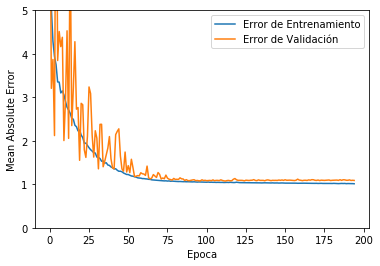

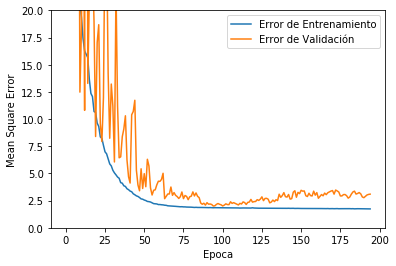

In [233]:
#Volviendo a re-entrenar el modelo pero ahora, para detenerlo en caso de que no mejore el score de validación.
#Se utilizará una llamada de "Parada Temprana".
#Tomado de la referencia de keras de regresión básica

model_early_stop = build_model_3()

EPOCHS=500

#El parámetro patience es el número de épocas que esperaremos para una mejora
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history = model_early_stop.fit(train_dataset, train_labels, epochs=EPOCHS,
                    validation_split = 0.3, verbose=1, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [234]:
# Generando las predicciones
y_predict = model_early_stop.predict(X_test)

#Comparando algunas predicciones vs valores reales
print("Valores Predichos")
print(y_predict[0:5])
print("Valores Reales")
print(Y_test.iloc[0:5].values)

Valores Predichos
[[0.52069426 1.0939829 ]
 [0.05293456 1.0323409 ]
 [0.622564   0.5434776 ]
 [0.02549989 1.0486113 ]
 [0.01927076 1.1144247 ]]
Valores Reales
[[-0.01410099  0.43851354]
 [ 0.90625105  0.74593764]
 [ 0.81327691  0.33611374]
 [-0.70962814  1.61685259]
 [-0.55983427  1.07146232]]


In [235]:
#Obteniendo algunas métricas importantes utilizando las funciones de scikit learn
mae_maz,mse_maz,rmse_maz,mape_maz,maxe_maz = metricas(Y_test.iloc[:,0],y_predict[:,0])
mae_mze,mse_mze,rmse_mze,mape_mze,maxe_mze = metricas(Y_test.iloc[:,1],y_predict[:,1])

row_maz = [mae_maz,mse_maz,rmse_maz,mape_maz,maxe_maz]
row_mze = [mae_mze,mse_mze,rmse_mze,mape_mze,maxe_mze]

data_errors = [row_maz,row_mze]

met_df = pd.DataFrame(data_errors, columns=['MAE','MSE','RMSE','MAPE','MAXE'])

print("\nMétricas de error, 0=Muon_Azimut, 1=Muon_Zenit")
met_df.transpose()


Métricas de error, 0=Muon_Azimut, 1=Muon_Zenit


,0,1
MAE,1.591528,0.550300
MSE,4.777115,0.481430
RMSE,2.185661,0.693852
MAPE,197.722210,84.329330
MAXE,63.917992,2.827609


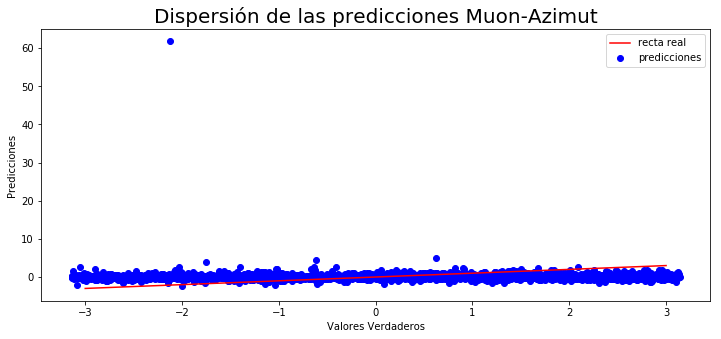

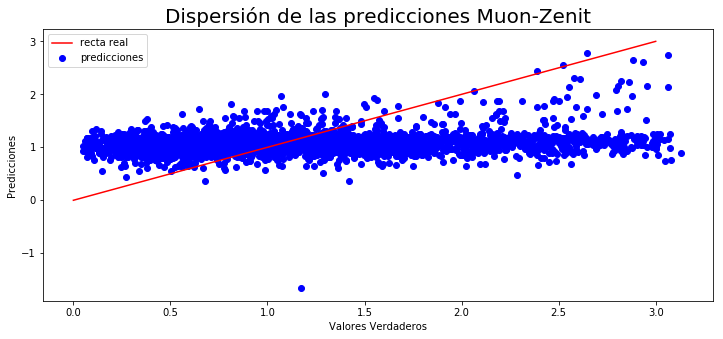

In [236]:
#Graficando la dispersión de las predicciones
plt.figure(figsize=(12,5))
plt.title("Dispersión de las predicciones Muon-Azimut", size=20)
plt.xlabel('Valores Verdaderos')
plt.ylabel('Predicciones')
plt.scatter(Y_test.iloc[:,0],y_predict[:,0], c="blue",label="predicciones")
_ = plt.plot([-3, 3], [-3, 3],c="red",label="recta real")
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.title("Dispersión de las predicciones Muon-Zenit", size=20)
plt.xlabel('Valores Verdaderos')
plt.ylabel('Predicciones')
plt.scatter(Y_test.iloc[:,1],y_predict[:,1], c="blue",label="predicciones")
_ = plt.plot([0, 3], [0, 3],c="red",label="recta real")
plt.legend()
plt.show()

In [ ]:
#Calculando los errores
errors = preds - test_labels
errors.head()

In [ ]:
#Graficando la distribución de los errores
plt.hist(errors, bins = 'auto', figsize=(8,8))
plt.xlabel("Error de Predicción")
_ = plt.ylabel("Conteo")